[![View on GitHub](https://img.shields.io/badge/GitHub-View_on_GitHub-blue?logo=GitHub)](https://github.com/khuyentran1401/Data-science/blob/master/data_science_tools/Yellowbrick.ipynb)

[<img src="https://deepnote.com/buttons/launch-in-deepnote.svg">](https://deepnote.com/project/Data-science-hxlyJpi-QrKFJziQgoMSmQ/%2FData-science%2Fdata_science_tools%2FYellowbrick.ipynb)

 [![View Article](https://img.shields.io/badge/View%20Article-View%20Full%20Article-red)](https://towardsdatascience.com/introduction-to-yellowbrick-a-python-library-to-explain-the-prediction-of-your-machine-learning-d63ecee10ecc)

In [ ]:
!pip install yellowbrick==1.3.post1

# Load data

In [ ]:
from yellowbrick.datasets.loaders import load_occupancy
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


In [ ]:
X, y = load_occupancy()

In [ ]:
X.head(10)

,temperature,relative humidity,light,CO2,humidity
0,23.180,27.2720,426.0,721.250000,0.004793
1,23.150,27.2675,429.5,714.000000,0.004783
2,23.150,27.2450,426.0,713.500000,0.004779
3,23.150,27.2000,426.0,708.250000,0.004772
4,23.100,27.2000,426.0,704.500000,0.004757
5,23.100,27.2000,419.0,701.000000,0.004757
6,23.100,27.2000,419.0,701.666667,0.004757
7,23.100,27.2000,419.0,699.000000,0.004757
8,23.100,27.2000,419.0,689.333333,0.004757
9,23.075,27.1750,419.0,688.000000,0.004745


# Visualize the data

## Rank features

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


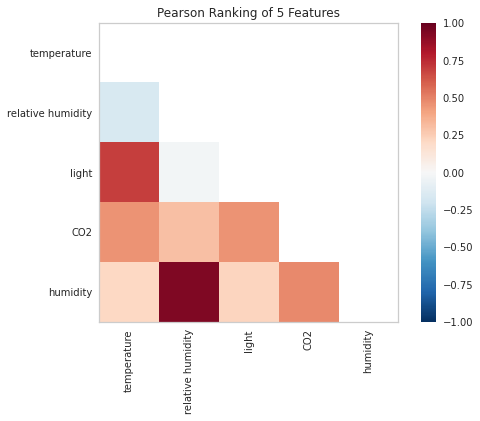

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [ ]:
fig, ax = plt.subplots()
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

## Class balance

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


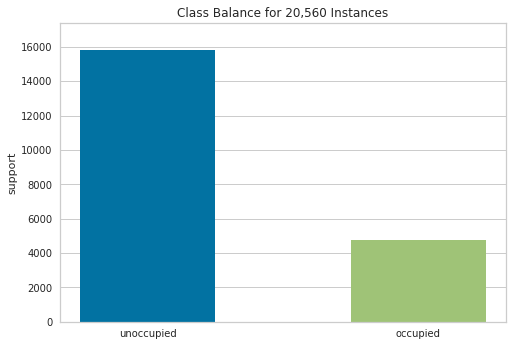

<AxesSubplot:title={'center':'Class Balance for 20,560 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

fig, ax = plt.subplots()
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Visualize results of the model

## Find f1 score

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
pred = model.predict(X_test)

f1_score(y_test, pred)

0.9730716567777271

## Classification Report

In [ ]:
from yellowbrick.classifier import classification_report

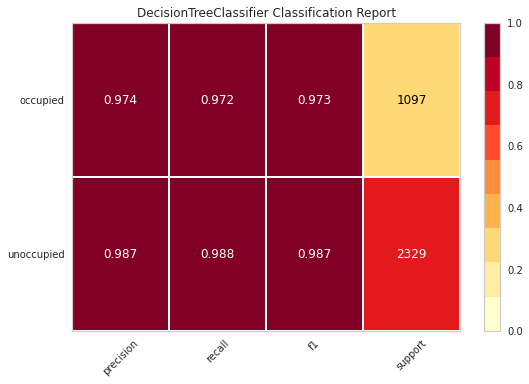

In [ ]:
# Instantiate the visualizer
fig, ax = plt.subplots()

visualizer = classification_report(
    model, X_train, y_train, X_test, y_test, classes=classes, support=True
)

## Confusion Matrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

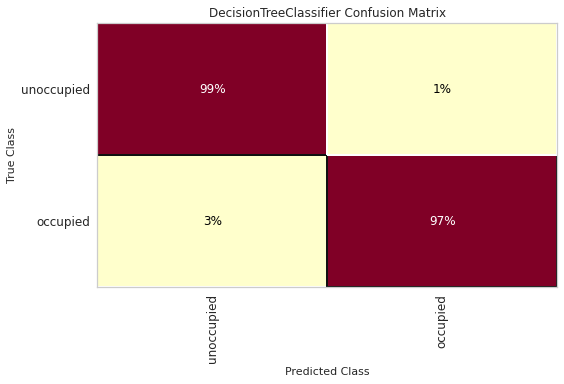

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
fig, ax = plt.subplots()

cm = ConfusionMatrix(model, classes=classes, percent=True)

cm.fit(X_train, y_train)

cm.score(X_test, y_test)

cm.show()

## ROCAUC

A ROCAUC plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.

a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. 

The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

The higher the area under the curve (AUC), the better the model generally is.

In [ ]:
from yellowbrick.classifier import ROCAUC


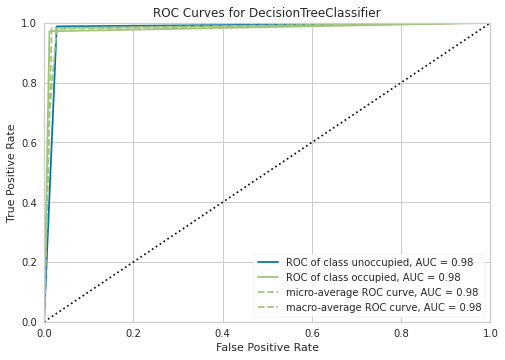

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
fig, ax = plt.subplots()

visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()                       


## Class Prediction Error

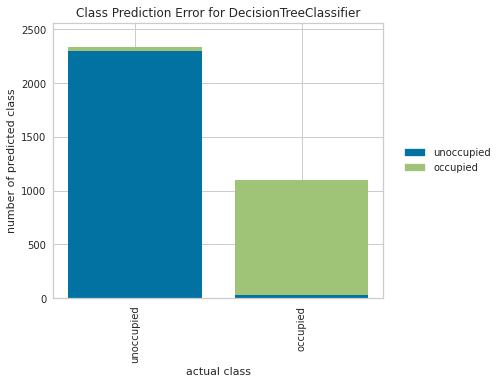

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
from yellowbrick.classifier import ClassPredictionError


# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

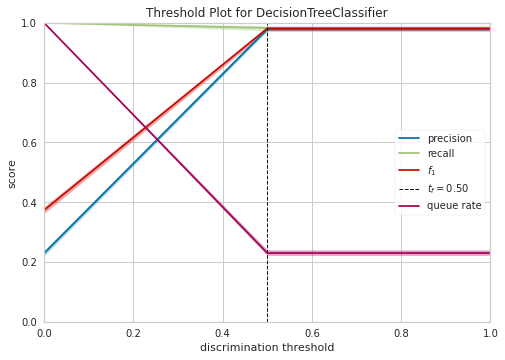

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots()

visualizer = DiscriminationThreshold(model)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Validation Curve

In [ ]:
from yellowbrick.model_selection import validation_curve
import numpy as np 

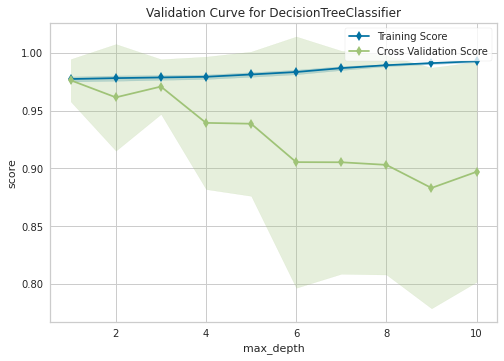

In [ ]:
fig, ax = plt.subplots()

viz = validation_curve(
    model, X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1",
)

## Learning Curve

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold


In [ ]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

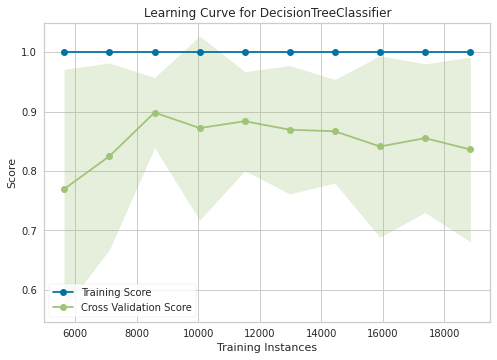

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
fig, ax = plt.subplots()

visualizer = LearningCurve(
    model, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Cross Validation Scores

In [ ]:
from yellowbrick.model_selection import CVScores


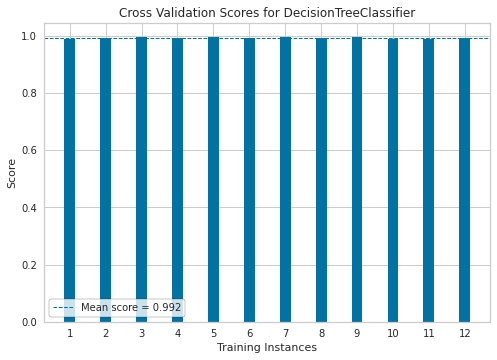

<AxesSubplot:title={'center':'Cross Validation Scores for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42, shuffle=True)

fig, ax = plt.subplots()

# Instantiate the classification model and visualizer
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


## Feature Importances

This shows the features ranked according to the explained variance each feature contributes to the model.

In [ ]:
from yellowbrick.model_selection import FeatureImportances


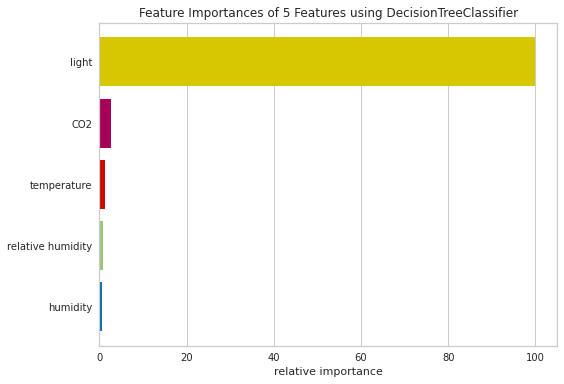

<AxesSubplot:title={'center':'Feature Importances of 5 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [ ]:
fig, ax = plt.subplots()

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87197226-98be-42b2-8527-389082831299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>